## Statistical Analysis of Energy Consumption Changes by State

### Data Loading and Preprocessing
- The data is loaded from the revised CSV file into a Pandas DataFrame.
- The 'month' column is converted to datetime format to facilitate time-based analysis.
- Data is grouped by region and state to perform state-wise statistical analysis.

### Statistical Analysis
- For each state, statistical analysis is performed on various energy types including coal, gas, diesel, thermal_total, nuclear, hydro, res, and grand_total.
- The analysis includes calculating the change in energy consumption from the first month to the last month for each energy type.
- The change is categorized as an increase, decrease, or no change based on the difference between the start and end values.
- Results are stored in a list, which is later converted to a DataFrame for easy visualization and further analysis.

### Save Results
- The statistical analysis results are saved to a CSV file named 'energy_change_analysis.csv' for future reference or additional analysis.

This process provides insights into how energy consumption patterns vary across different states and regions over time, allowing for informed decision-making and policy planning.


In [53]:
import pandas as pd
from datetime import datetime

# Load the data from the revised CSV file into a DataFrame
df = pd.read_csv('output_data2_revised.csv')

# Convert 'month' column to datetime
df['month'] = pd.to_datetime(df['month'], format='%b-%Y')

# Group data by region and state
grouped_data = df.groupby(['region', 'state'])

# Initialize a list to store statistical analysis results
results = []

# Perform statistical analysis for each group
for group_name, group_data in grouped_data:
    region, state = group_name
    # Get the first row of each state
    first_row = group_data.iloc[0]
    for energy_type in ['coal', 'gas', 'diesel', 'thermal_total', 'nuclear', 'hydro', 'res', 'grand_total']:
        start_date = first_row['month']
        end_date = group_data.iloc[-1]['month']
        start_value = first_row[energy_type]
        end_value = group_data.iloc[-1][energy_type]
        change = end_value - start_value
        if change == 0:
            change_sign = 'No Change'
        else:
            change_sign = 'Increase' if change > 0 else 'Decrease'
        results.append({'region': region, 'state': state, 'energy_type': energy_type,
                        'start_date': start_date, 'end_date': end_date,
                        'start_value': start_value, 'end_value': end_value,
                        'change': change, 'change_sign': change_sign})

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Save the statistical analysis results to a CSV file
results_df.to_csv('energy_change_analysis.csv', index=False)


## Energy Change Analysis

This Python script analyzes the change in energy consumption over time for different energy types across various states. Here's a breakdown of what the script does:

### Import Libraries
The script imports the necessary libraries, including Pandas for data manipulation and Matplotlib for plotting.

### Load Data
It loads the statistical analysis results from a CSV file into a DataFrame.

### Iterate Over Energy Types
The script iterates over a list of energy types to analyze, including coal, gas, diesel, thermal total, nuclear, hydro, res, and grand total.

### Filter Data
For each energy type, the script filters the DataFrame to obtain data related to that energy type.

### Plot Bar Graph
It plots a bar graph showing the change over time for the current energy type. The bars are color-coded based on whether the change is an increase (green), decrease (red), or no change (gray).

### Add Title and Labels
The script adds a title to the plot indicating the energy type and its change over time. It labels the x-axis as "State Serial Number" and the y-axis as "Change".

### Add Information
Information about the analysis, such as the type of energy being analyzed and the number of states included in the analysis, is added to the plot.

### Display Plot
The script displays the plot for the current energy type, iterating over all energy types to generate separate plots.

This script provides an insightful visual representation of energy consumption changes over time, helping to identify trends and patterns across different energy types and states.


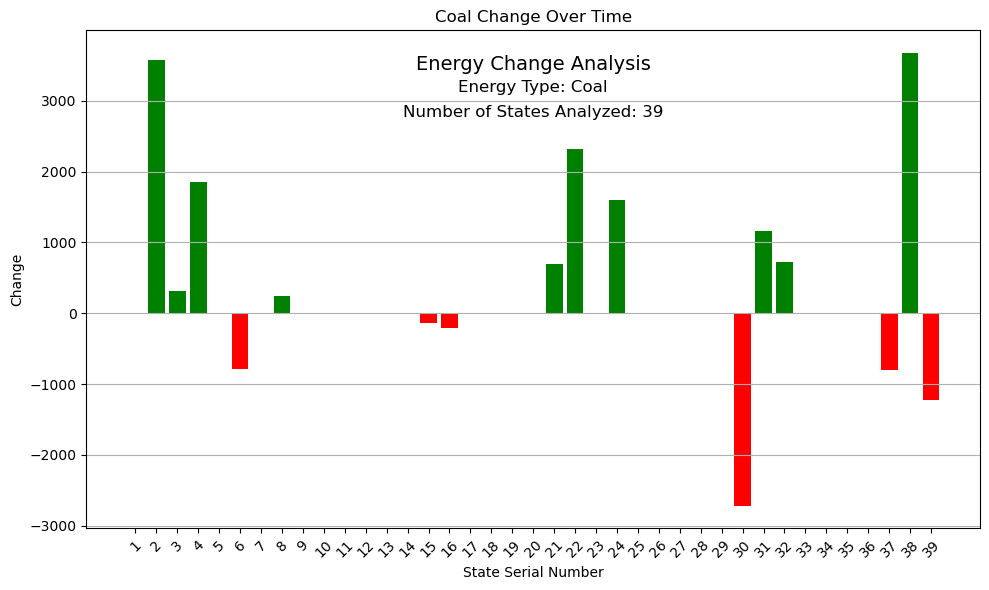

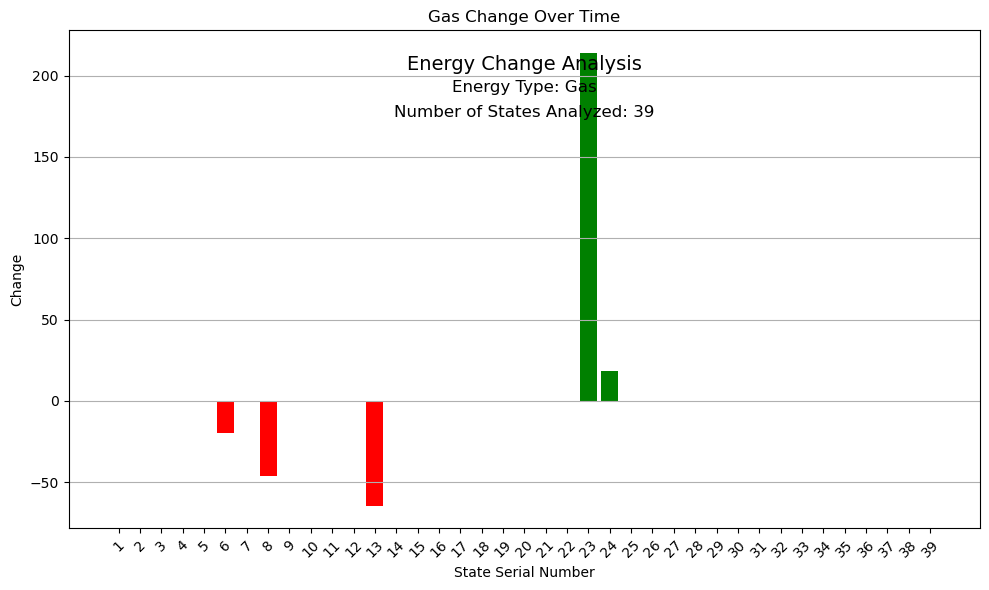

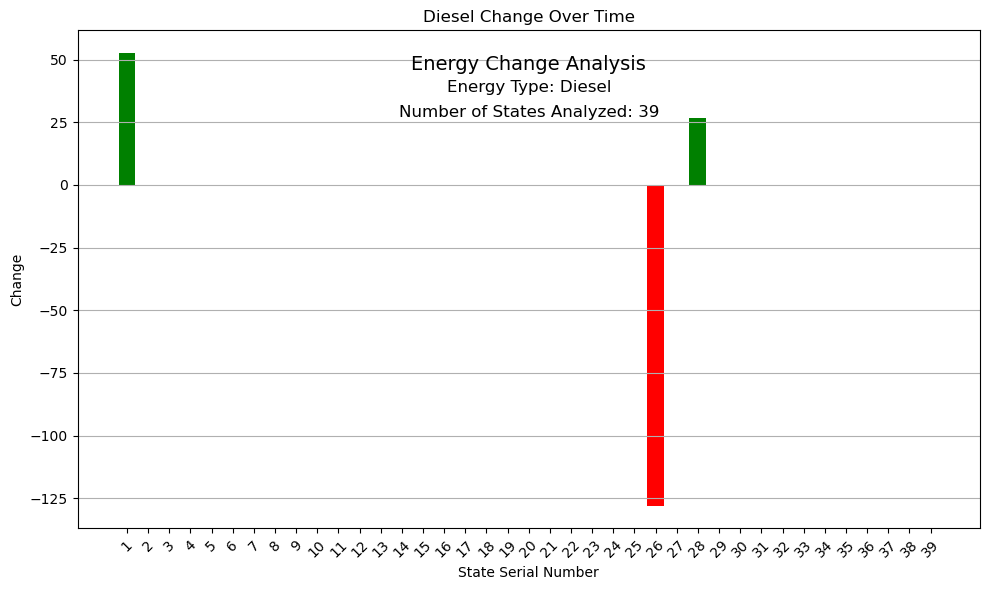

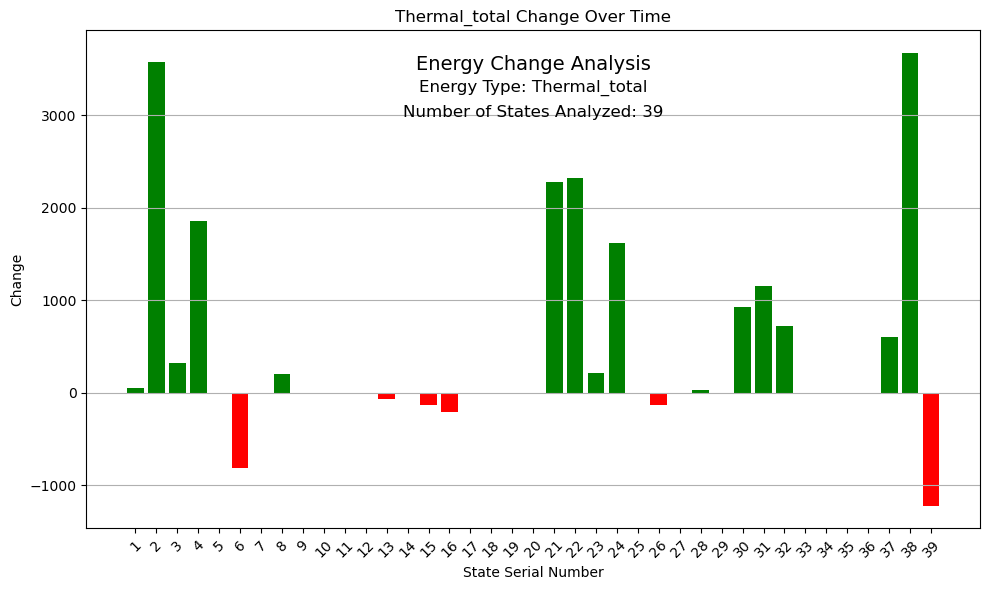

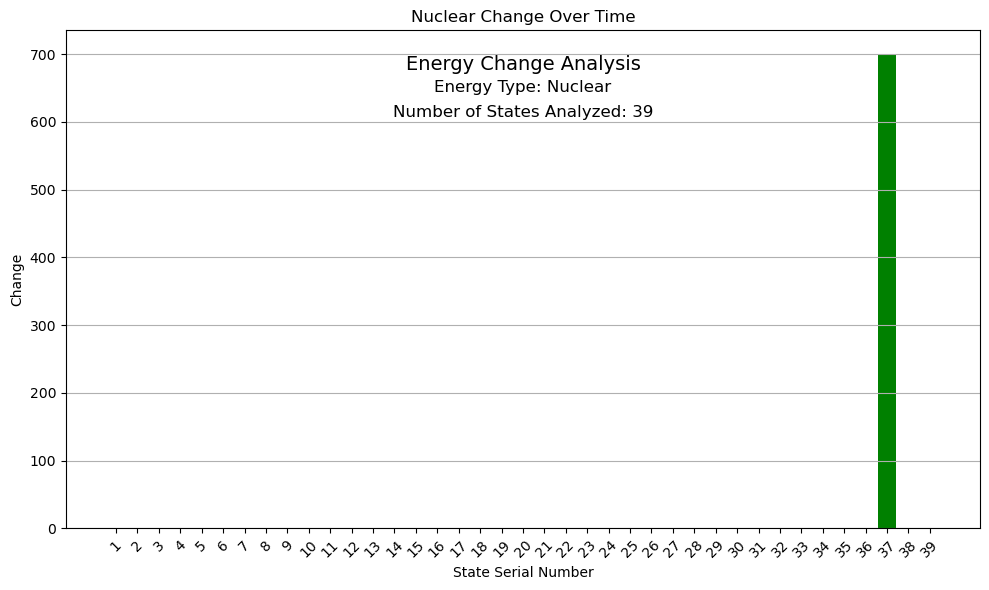

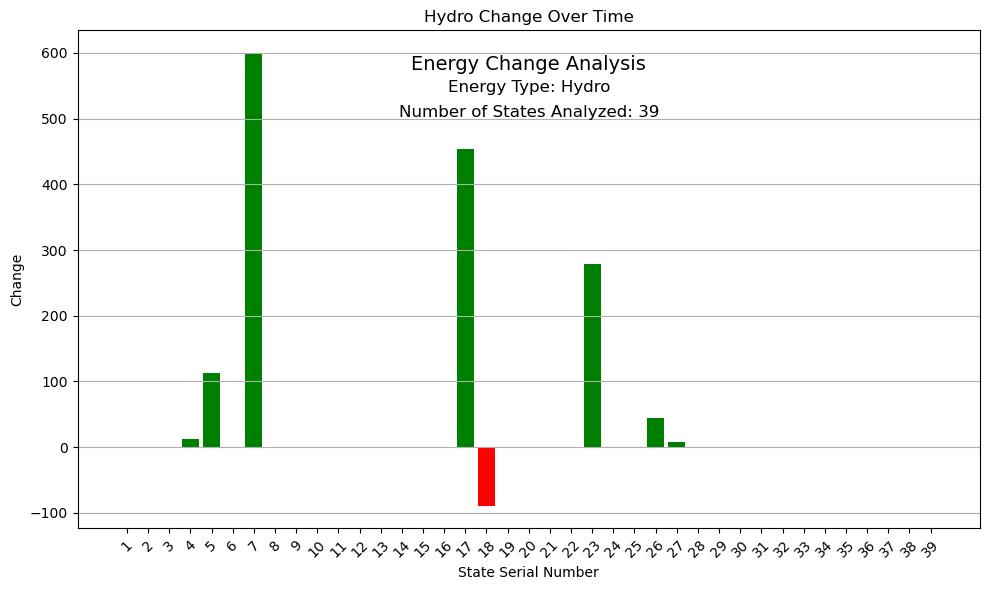

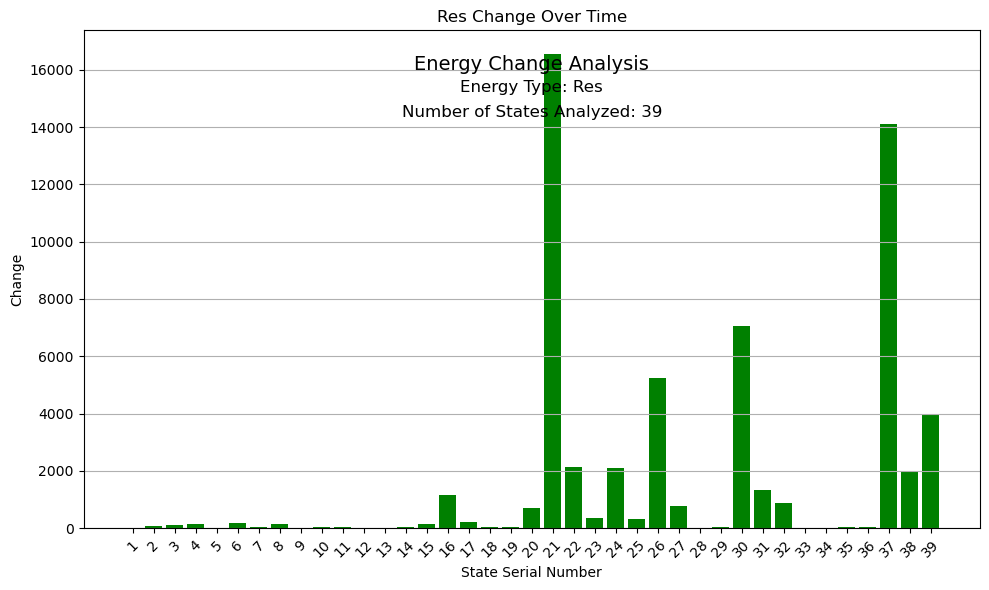

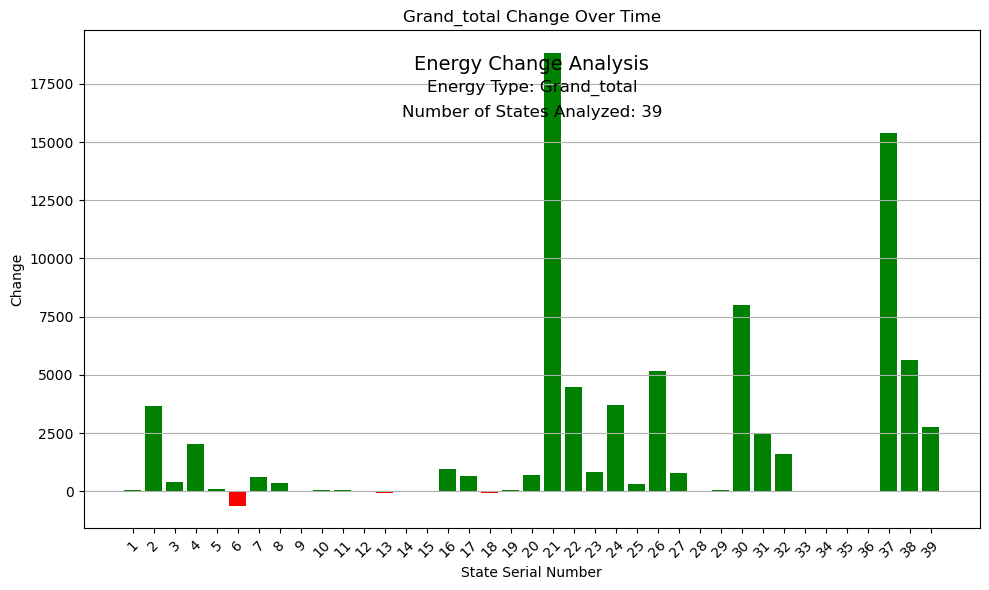

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the statistical analysis results from the CSV file
results_df = pd.read_csv('energy_change_analysis.csv')

# Iterate over each energy type and plot a bar graph
for energy_type in ['coal', 'gas', 'diesel', 'thermal_total', 'nuclear', 'hydro', 'res', 'grand_total']:
    # Filter the DataFrame for the current energy type
    energy_data = results_df[results_df['energy_type'] == energy_type]

    # Plot a bar graph with positive values on the positive y-axis and negative values on the negative y-axis
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(energy_data)), energy_data['change'], color=energy_data['change_sign'].map({'Increase': 'green', 'Decrease': 'red', 'No Change': 'gray'}))
    plt.title(f'{energy_type.capitalize()} Change Over Time')
    plt.xlabel('State Serial Number')
    plt.ylabel('Change')
    plt.xticks(range(len(energy_data)), energy_data['state_index'], rotation=45)  # Use state index as tick labels
    plt.grid(axis='y')
    
    # Add information about the analysis
    plt.text(0.5, 0.95, 'Energy Change Analysis', transform=plt.gca().transAxes, fontsize=14, ha='center', va='top')
    plt.text(0.5, 0.90, f'Energy Type: {energy_type.capitalize()}', transform=plt.gca().transAxes, fontsize=12, ha='center', va='top')
    plt.text(0.5, 0.85, f'Number of States Analyzed: {len(energy_data)}', transform=plt.gca().transAxes, fontsize=12, ha='center', va='top')
    
    plt.tight_layout()
    plt.show()


## Total Energy Consumption by Region

This Python script analyzes and visualizes the total energy consumption by region, distinguishing between renewable (R) and non-renewable (NR) energy sources.

### Import Libraries
The script imports Pandas for data manipulation and Matplotlib for plotting.

### Load Data
It loads the energy consumption data from a CSV file into a DataFrame.

### Calculate Total Energy Consumption
The script calculates the total energy consumption from non-renewable (coal, gas, diesel) and renewable (nuclear, hydro, res) sources for each region.

### Group Data
The data is grouped by region to aggregate the total energy consumption.

### Visualize Data
A stacked bar plot is generated to visualize the total energy consumption by region. Renewable and non-renewable energy sources are represented by different colors within each bar.

### Add Annotations
Annotations are added to each bar to display the total energy consumption (T), renewable energy consumption (R), and non-renewable energy consumption (NR) for each region.

### Display Plot
The plot is displayed, providing an insightful overview of total energy consumption across different regions and the contribution of renewable and non-renewable sources to the total.

This script offers a clear visualization of regional energy consumption patterns, helping to identify regions with high reliance on renewable or non-renewable energy sources.


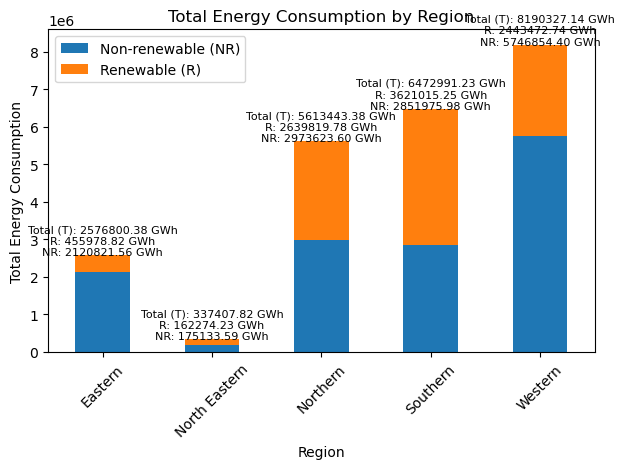

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('output_data2_revised.csv')

# Calculate total energy consumption from non-renewable and renewable sources
non_renewable_cols = ['coal', 'gas', 'diesel']
renewable_cols = ['nuclear', 'hydro', 'res']
data['T_NR'] = data[non_renewable_cols].sum(axis=1)
data['T_R'] = data[renewable_cols].sum(axis=1)

# Group by region or state and calculate total energy consumption
region_total_energy = data.groupby('region')[['T_NR', 'T_R']].sum()

# Visualize total energy consumption by region
region_total_energy.plot(kind='bar', stacked=True)
plt.title('Total Energy Consumption by Region')
plt.xlabel('Region')
plt.ylabel('Total Energy Consumption')
plt.xticks(rotation=45)
plt.legend(['Non-renewable (NR)', 'Renewable (R)'])

# Add annotations with total energy consumption values for each region
for i in range(len(region_total_energy)):
    nr = region_total_energy.iloc[i]['T_NR']
    r = region_total_energy.iloc[i]['T_R']
    t = nr + r
    plt.text(i, t + 50, f'Total (T): {t:.2f} GWh\nR: {r:.2f} GWh\nNR: {nr:.2f} GWh', ha='center', fontsize=8)

plt.tight_layout()
plt.show()


## Analysis and Visualization of Renewable Energy Consumption

### Import Libraries
The script imports necessary libraries such as Pandas for data manipulation, scikit-learn for machine learning tasks, Matplotlib for visualization, and Tabulate for creating tables.

### Load and Prepare Data
The script loads energy consumption data from a CSV file and calculates the total renewable and non-renewable energy consumption.

### Linear Regression Model
It prepares the data for training a linear regression model by defining features (non-renewable sources) and the target (total renewable energy consumption). Then, it splits the data into training and testing sets.

### Train and Evaluate Model
A linear regression model is trained on the training data and evaluated using the testing data. The script calculates the R-squared score and mean absolute error to assess the model's performance.

**R-squared Score:** The R-squared score measures the proportion of the variance in the dependent variable (renewable energy consumption) that is predictable from the independent variables (non-renewable energy sources). It ranges from 0 to 1, where 1 indicates a perfect fit.

### Visualization: Actual vs. Predicted Values
A scatter plot is generated to visualize the relationship between actual and predicted renewable energy consumption. The red dashed line represents perfect predictions, while blue dots represent actual vs. predicted values.

### Annotations for Model Performance
The plot includes annotations showing the R-squared score and mean absolute error, providing insights into the model's accuracy.

### Identify High Non-Renewable Consumption Regions
The script identifies regions with high non-renewable energy consumption by comparing total renewable and non-renewable energy usage.

### Print Region-wise Analysis
Finally, the script prints tables showing regions in decreasing order of renewable and non-renewable energy consumption, providing a detailed summary of energy usage across different regions.


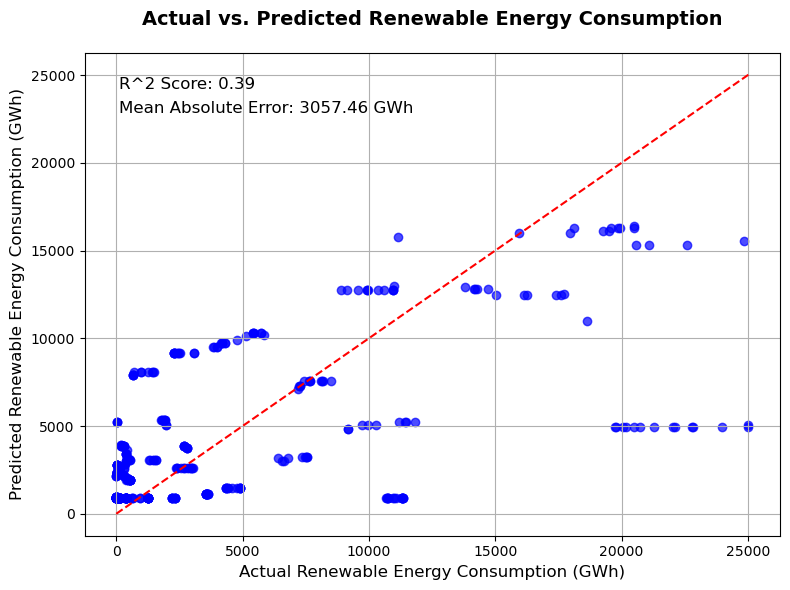


Regions in decreasing order of use of renewable energy:
+---+---------------+--------------------+
|   |    region     |  total_renewable   |
+---+---------------+--------------------+
| 0 |   Southern    |     3621015.25     |
| 1 |   Northern    | 2639819.7800000003 |
| 2 |    Western    |     2443472.74     |
| 3 |    Eastern    |     455978.82      |
| 4 | North Eastern |     162274.23      |
+---+---------------+--------------------+

Regions in decreasing order of use of non-renewable energy:
+---+---------------+---------------------+
|   |    region     | total_non_renewable |
+---+---------------+---------------------+
| 0 |    Western    |      5746854.4      |
| 1 |   Northern    |      2973623.6      |
| 2 |   Southern    |     2851975.98      |
| 3 |    Eastern    |     2120821.56      |
| 4 | North Eastern |      175133.59      |
+---+---------------+---------------------+


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.metrics import mean_absolute_error  # Import mean_absolute_error function

# Load the data
data = pd.read_csv('output_data2_revised.csv')

# Calculate total renewable energy consumption
data['total_renewable'] = data[['res', 'hydro', 'nuclear']].sum(axis=1)

# Calculate total non-renewable energy consumption
data['total_non_renewable'] = data[['coal', 'gas', 'diesel']].sum(axis=1)

# Prepare the data
X = data[['coal', 'gas', 'diesel']]  # Features: non-renewable sources
y = data['total_renewable']  # Target: total renewable energy

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Visualize the predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Actual Renewable Energy Consumption (GWh)', fontsize=12)
plt.ylabel('Predicted Renewable Energy Consumption (GWh)', fontsize=12)
plt.title('Actual vs. Predicted Renewable Energy Consumption', fontsize=14, fontweight='bold', pad=20)
plt.grid(True)
plt.tight_layout()

# Add annotation with model performance metrics
plt.text(0.05, 0.95, f'R^2 Score: {model.score(X_test, y_test):.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')
plt.text(0.05, 0.90, f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f} GWh', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')

plt.show()

# Identify regions with high non-renewable energy consumption
high_consumption_regions = data[data['total_non_renewable'] > data['total_renewable']]['region'].unique()

# Print regions in decreasing order of use of renewable energy
renewable_table = data.groupby('region')['total_renewable'].sum().sort_values(ascending=False).reset_index()
print("\nRegions in decreasing order of use of renewable energy:")
print(tabulate(renewable_table, headers='keys', tablefmt='pretty'))

# Print regions in decreasing order of use of non-renewable energy
non_renewable_table = data.groupby('region')['total_non_renewable'].sum().sort_values(ascending=False).reset_index()
print("\nRegions in decreasing order of use of non-renewable energy:")
print(tabulate(non_renewable_table, headers='keys', tablefmt='pretty'))


## Energy Usage Visualization with Load Shifting and Demand Response

### Simulated Energy Data
- Simulated energy data for January 2024 is generated, including timestamps and energy usage.
- The energy usage is generated with a normal distribution with a mean of 100 kWh and a standard deviation of 20 kWh.

### Load Shifting
- Off-peak hours (nighttime) are simulated by filtering the data for hours between 10 PM and 6 AM.
- Non-critical tasks such as charging electric vehicles and running non-essential equipment are identified for scheduling during off-peak hours.

### Demand Response
- Grid signals or price fluctuations are simulated with random values between 0 and 1.
- Energy consumption is adjusted based on grid signals or price fluctuations, reducing usage by 20% during high signals.

### Visualization
- The energy usage patterns and optimization results are visualized for January 2024.
- The original energy usage is plotted in dark blue, while the adjusted usage is shown in salmon color.
- Off-peak hours are highlighted with green markers on the plot.

### Additional Information
- Text annotations below the graph provide important details:
  - Total original energy usage for the month.
  - Total adjusted energy usage considering load shifting and demand response.
  - Number of off-peak hours scheduled for non-critical tasks.
- Adjusted spacing ensures clarity and readability of the annotations.

This visualization provides insights into energy consumption patterns, optimization strategies, and the impact of load shifting and demand response measures.


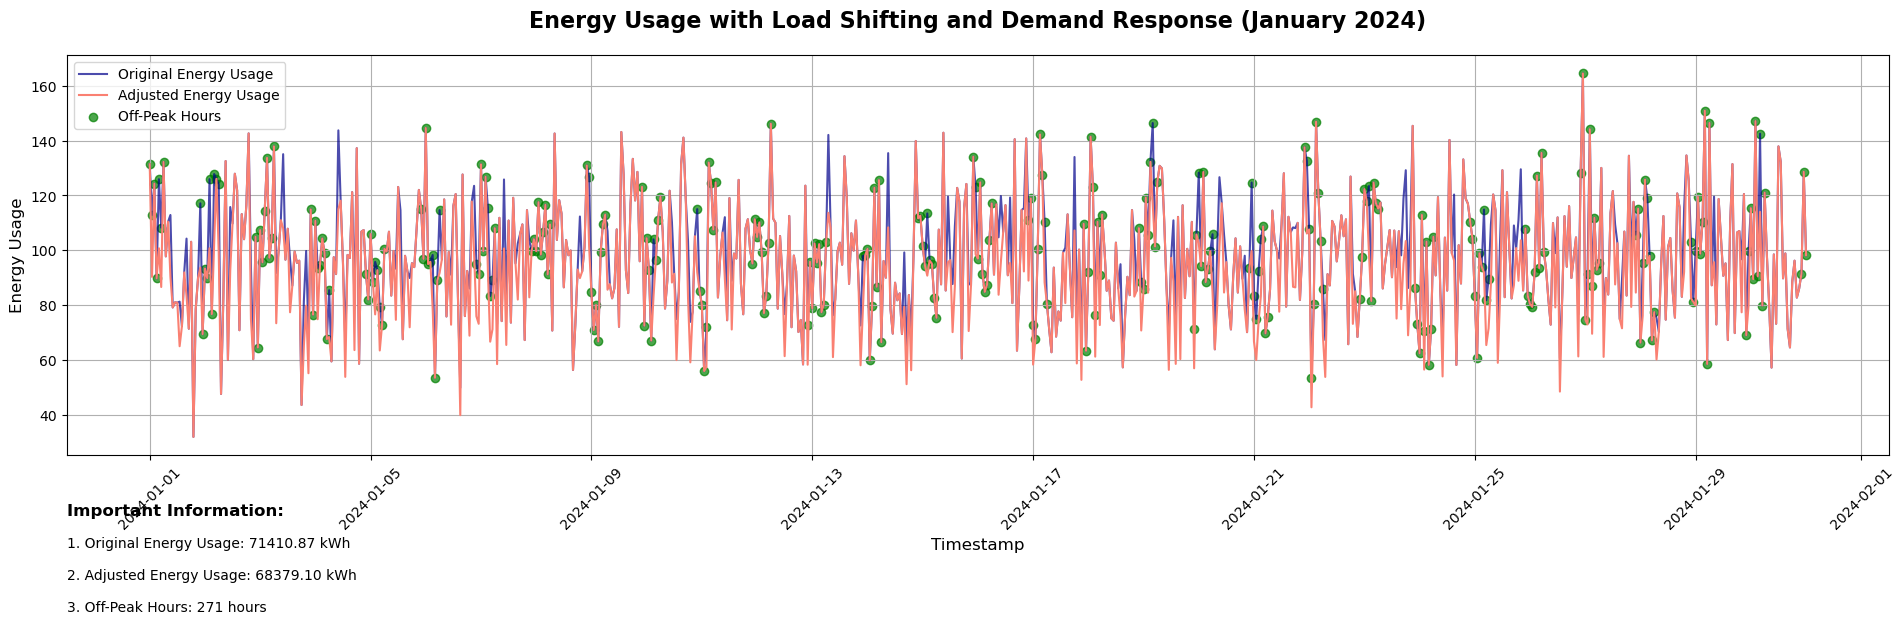

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulate energy data
start_date = '2024-01-01'
end_date = '2024-01-31'  # Modify to show only one month
num_days = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days + 1
timestamps = pd.date_range(start=start_date, end=end_date, freq='H')
energy_usage = np.random.normal(loc=100, scale=20, size=len(timestamps))  # Simulate energy usage
energy_data = pd.DataFrame({'timestamp': timestamps, 'energy_usage': energy_usage})

# Load Shifting
# Simulate off-peak hours (e.g., nighttime)
off_peak_hours = energy_data[(energy_data['timestamp'].dt.hour >= 22) | (energy_data['timestamp'].dt.hour <= 6)].copy()

# Identify non-critical tasks that can be shifted to off-peak hours
non_critical_tasks = ['Charging electric vehicles', 'Running non-essential equipment']

# Schedule these tasks to run during off-peak hours
off_peak_hours['scheduled_task'] = np.random.choice(non_critical_tasks, size=len(off_peak_hours))

# Demand Response
# Simulate grid signals or price fluctuations
grid_signals = np.random.uniform(low=0, high=1, size=len(energy_data))  # Random grid signals between 0 and 1

# Adjust energy consumption based on grid signals or price fluctuations
energy_data['adjusted_energy_usage'] = energy_data['energy_usage']
energy_data.loc[grid_signals > 0.8, 'adjusted_energy_usage'] *= 0.8  # Reduce energy usage by 20% during high grid signals

# Visualize energy usage patterns and optimization results for one month
plt.figure(figsize=(20, 8))
plt.title('Energy Usage with Load Shifting and Demand Response (January 2024)', fontsize=16, fontweight='bold', pad=20)  # Add padding to the title
plt.plot(energy_data['timestamp'], energy_data['energy_usage'], label='Original Energy Usage', color='darkblue', alpha=0.7)  # Sky blue color
plt.plot(energy_data['timestamp'], energy_data['adjusted_energy_usage'], label='Adjusted Energy Usage', color='salmon')  # Salmon color
plt.scatter(off_peak_hours['timestamp'], off_peak_hours['energy_usage'], color='green', label='Off-Peak Hours', alpha=0.7)  # Lime green color
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Energy Usage', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Additional text below the graph with improved spacing
plt.text(0, -0.15, 'Important Information:', transform=plt.gca().transAxes, fontsize=12, fontweight='bold')  # Adjusted y-coordinate
plt.text(0, -0.23, f'1. Original Energy Usage: {energy_data["energy_usage"].sum():.2f} kWh', transform=plt.gca().transAxes, fontsize=10)  # Adjusted y-coordinate
plt.text(0, -0.31, f'2. Adjusted Energy Usage: {energy_data["adjusted_energy_usage"].sum():.2f} kWh', transform=plt.gca().transAxes, fontsize=10)  # Adjusted y-coordinate
plt.text(0, -0.39, f'3. Off-Peak Hours: {len(off_peak_hours)} hours', transform=plt.gca().transAxes, fontsize=10)  # Adjusted y-coordinate

plt.tight_layout(pad=4)  # Add padding to the layout
plt.show()


## Energy Usage Distribution Analysis

### Simulated Energy Data
- Energy data is simulated for the entire year of 2024, with hourly timestamps and corresponding energy usage values.
- The energy usage is generated with a normal distribution with a mean of 100 kWh and a standard deviation of 20 kWh.

### Load Shifting and Demand Response Simulation
- Off-peak hours are simulated by filtering the data for nighttime hours (between 10 PM and 6 AM).
- Non-critical tasks, such as charging electric vehicles and running non-essential equipment, are scheduled during off-peak hours.
- Grid signals or price fluctuations are simulated with random values between 0 and 1.
- Energy consumption is adjusted based on grid signals or price fluctuations, reducing usage by 20% during high signals.

### Daily Aggregation
- Energy data is aggregated on a daily basis to analyze overall energy usage and adjustments.

### Energy Usage Distribution Visualization
- A pie chart is plotted to visualize the distribution of original and adjusted energy usage.
- The original energy usage is shown in blue, and the adjusted energy usage is shown in red.
- The total original and adjusted energy usage values are displayed within a box to provide context.

### Overall Reduction
- The overall reduction in energy usage due to load shifting and demand response measures is calculated and displayed separately.

This visualization provides insights into how load shifting and demand response strategies can impact overall energy consumption patterns and contribute to energy savings.


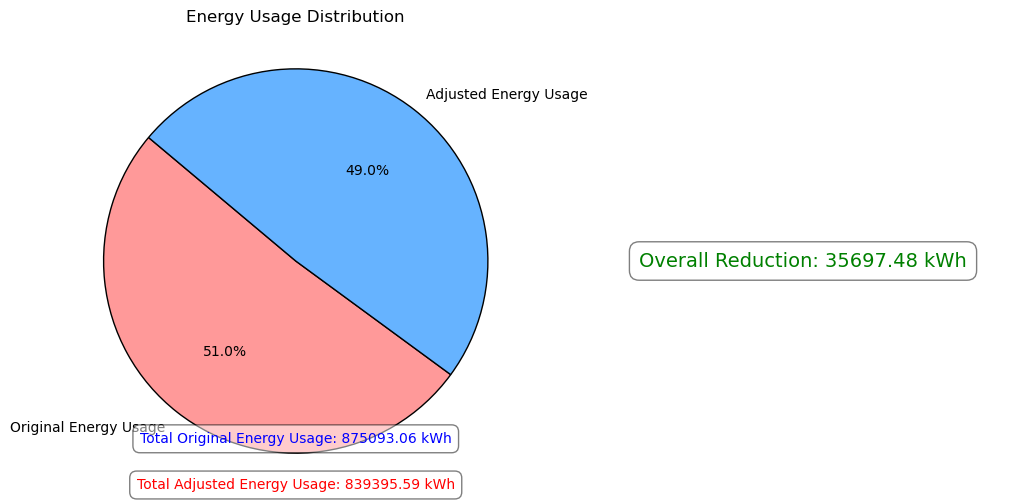

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulate energy data
start_date = '2024-01-01'
end_date = '2024-12-31'
num_days = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days + 1
timestamps = pd.date_range(start=start_date, end=end_date, freq='H')
energy_usage = np.random.normal(loc=100, scale=20, size=len(timestamps))  # Simulate energy usage
energy_data = pd.DataFrame({'timestamp': timestamps, 'energy_usage': energy_usage})

# Load Shifting
# Simulate off-peak hours (e.g., nighttime)
off_peak_hours = energy_data[(energy_data['timestamp'].dt.hour >= 22) | (energy_data['timestamp'].dt.hour <= 6)].copy()

# Identify non-critical tasks that can be shifted to off-peak hours
non_critical_tasks = ['Charging electric vehicles', 'Running non-essential equipment']

# Schedule these tasks to run during off-peak hours
off_peak_hours['scheduled_task'] = np.random.choice(non_critical_tasks, size=len(off_peak_hours))

# Demand Response
# Simulate grid signals or price fluctuations
grid_signals = np.random.uniform(low=0, high=1, size=len(energy_data))  # Random grid signals between 0 and 1

# Adjust energy consumption based on grid signals or price fluctuations
energy_data['adjusted_energy_usage'] = energy_data['energy_usage']
energy_data.loc[grid_signals > 0.8, 'adjusted_energy_usage'] *= 0.8  # Reduce energy usage by 20% during high grid signals

# Aggregate data by day
energy_data['date'] = energy_data['timestamp'].dt.date
daily_energy_usage = energy_data.groupby('date').agg({'energy_usage': 'sum', 'adjusted_energy_usage': 'sum'})
daily_energy_usage.reset_index(inplace=True)

# Calculate total energy usage
total_original_energy = daily_energy_usage['energy_usage'].sum()
total_adjusted_energy = daily_energy_usage['adjusted_energy_usage'].sum()

# Create labels for the pie chart
labels = ['Original Energy Usage', 'Adjusted Energy Usage']
sizes = [total_original_energy, total_adjusted_energy]
colors = ['#ff9999','#66b3ff']

# Plot pie chart
plt.figure(figsize=(12, 6))

# Plot pie chart
plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='black'))
plt.title('Energy Usage Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add explanation with box
plt.text(0.5, 0.1, f'Total Original Energy Usage: {total_original_energy:.2f} kWh', transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='center', color='blue', bbox=dict(facecolor='white', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.5'))
plt.text(0.5, 0.0, f'Total Adjusted Energy Usage: {total_adjusted_energy:.2f} kWh', transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='center', color='red', bbox=dict(facecolor='white', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.5'))

# Add overall reduction outside the pie chart
plt.subplot(1, 2, 2)
plt.text(0.5, 0.5, f'Overall Reduction: {(total_original_energy - total_adjusted_energy):.2f} kWh', fontsize=14, verticalalignment='center', horizontalalignment='center', color='green', bbox=dict(facecolor='white', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.5'))
plt.axis('off')

plt.show()
